In [1]:
import numpy as np
from pandas import read_csv

# from average_atom.core.average_atom_new import AverageAtom as AA
from average_atom.core.aa_types import AverageAtomFactory
from average_atom.core.misc import jacobi_relaxation, sor
from average_atom.core.grids import NonUniformGrid
from average_atom.core.physics import ThomasFermi, FermiDirac

import matplotlib.pyplot as plt

from hnc.hnc.constants import *
from hnc.hnc.misc import rs_from_n, n_from_rs

plt.rcParams.update({'font.size': 10})
plt.rcParams["figure.figsize"] = (5,3.5)
plt.rcParams["figure.dpi"] = 200
plt.rcParams['xtick.labelsize']=14

color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
# Aluminum
name='Xe'
Z, A = 54, 131.293

ni_cc = 1.249e20
ni_AU = ni_cc*invcc_to_AU
rs = rs_from_n(ni_AU)
R  = 5*rs

Ti_eV = 1
Te_eV = 1

Te_AU = Te_eV*eV_to_AU
Ti_AU = Ti_eV*eV_to_AU

aa_ZJ  = AverageAtomFactory.create_model("ZJ_ISModel", Z, A, Ti_AU, Te_AU, rs, R, name=name, ignore_vxc=True, Npoints=1000)#
aa_CS  = AverageAtomFactory.create_model("TFStarret2014", Z, A, Ti_AU, Te_AU, rs, R, name=name, ignore_vxc=True, rmin=1e-4, Npoints=2000)#, grid_spacing='quadratic',N_stencil_oneside=3)

________________________
Generating NPA
Using More TF fit for initial Zstar = 1.165
	Intializing grid
Initializing, True
Initializing
	Creating Integral Equation Solver
Intialized Potentials and Densities
Initialized
________________________
Generating NPA


/home/zach/plasma/average_atom/core/average_atom_new.py:284: RuntimeWarning: invalid value encountered in power
  nb_Mavrin_Demura_func = lambda r: np.nan_to_num(self.Z/(4*π*r_TF**3) * (Φ_Mavrin_Demura(x(r))/x(r) )**1.5)


Using More TF fit for initial Zstar = 1.165
	Intializing grid
Initializing, False
________________________
Generating NPA
Using More TF fit for initial Zstar = 1.165
	Intializing grid
Initializing, True
Initializing
	Creating Integral Equation Solver
Intialized Potentials and Densities
Initialized


In [3]:
aa_ZJ.solve(verbose=True, picard_alpha=0.2)

Beginning self-consistent electron solver.
_________________________________
__________________________________________
TF Iteration 0
	μ = -2.589359473e+00, change: 1.795487133e+01 (converged=False)
	φe Err =  4.851e-02, φe change =  9.911e-01
	ne Err =  9.004e-02, ne change =  5.896e-05
	Q =  0.000e+00 -> -1.647e+02, 
	Zstar guess =  1.165e+00. Current Zstar:  1.165e+00 (converged=True)
	Change =  1.933e+00
__________________________________________
TF Iteration 1
	μ = -2.585658865e+00, change: 1.429159354e-03 (converged=False)
	φe Err =  3.179e-02, φe change =  5.041e-02
	ne Err =  1.640e-01, ne change =  8.708e-05
	Q = -1.647e+02 -> -1.254e+02, 
	Zstar guess =  1.165e+00. Current Zstar:  1.165e+00 (converged=True)
	Change =  6.145e-02
__________________________________________
TF Iteration 2
	μ = -2.582537066e+00, change: 1.207351515e-03 (converged=False)
	φe Err =  3.110e-02, φe change =  2.402e-02
	ne Err =  1.007e-01, ne change =  1.381e-05
	Q = -1.254e+02 -> -9.490e+01, 
	Zstar

/home/zach/plasma/average_atom/core/average_atom_new.py:572: RuntimeWarning: invalid value encountered in divide
  rel_errs = 0.5*(np.abs(LHS - RHS)[:-1]/np.sqrt(LHS**2 + RHS**2)[:-1])


__________________________________________
TF Iteration 150
	μ = -1.512939744e-01, change: 1.251849633e-02 (converged=False)
	φe Err =  6.292e-04, φe change =  2.004e-08
	ne Err =  1.034e-04, ne change =  1.715e-11
	Q =  1.326e-01 -> -9.859e-02, 
	Zstar guess =  9.976e-01. Current Zstar:  1.143e+00 (converged=False)
	Change =  8.908e-03
__________________________________________
TF Iteration 175
	μ = -1.497579455e-01, change: 1.768812042e-06 (converged=True)
	φe Err =  5.222e-04, φe change =  1.417e-07
	ne Err =  5.228e-05, ne change =  2.410e-10
	Q =  2.269e-02 ->  1.740e-01, 
	Zstar guess =  9.774e-01. Current Zstar:  9.909e-01 (converged=False)
	Change =  1.408e-06
__________________________________________
TF Iteration 200
	μ = -1.492733290e-01, change: 4.842967216e-04 (converged=False)
	φe Err =  5.059e-04, φe change =  7.641e-10
	ne Err =  7.401e-06, ne change =  1.590e-12
	Q =  5.939e-03 ->  2.203e-02, 
	Zstar guess =  9.748e-01. Current Zstar:  9.745e-01 (converged=False)
	Chan

In [4]:
aa_CS.solve(verbose=True, picard_alpha=0.1)

Solving core.
Beginning self-consistent electron solver.
_________________________________
__________________________________________
TF Iteration 0
	μ = -2.584192495e+00, change: 1.791704754e+01 (converged=False)
	φe Err =  3.943e-02, φe change =  9.920e-01
	ne Err =  4.568e-02, ne change =  1.665e-06
	Q =  0.000e+00 -> -8.230e+01, 
	Zstar guess =  1.165e+00. Current Zstar:  1.165e+00 (converged=False)
	Change =  1.935e+00
__________________________________________
TF Iteration 1
	μ = -2.584182849e+00, change: 3.732926872e-06 (converged=True)
	φe Err =  1.933e-02, φe change =  2.571e-02
	ne Err =  1.193e-01, ne change =  2.651e-06
	Q = -8.230e+01 -> -7.138e+01, 
	Zstar guess =  1.165e+00. Current Zstar:  1.048e+00 (converged=False)
	Change =  2.988e-02
__________________________________________
TF Iteration 2
	μ = -2.584167547e+00, change: 5.921451925e-06 (converged=True)
	φe Err =  2.180e-02, φe change =  5.372e-03
	ne Err =  9.725e-02, ne change =  1.628e-06
	Q = -7.138e+01 -> -6.17

/home/zach/plasma/average_atom/core/aa_types.py:128: RuntimeWarning: invalid value encountered in log
  log_nb_data = np.where(self.core_atom.nb==0, np.log(1e-20), np.log(self.core_atom.nb) )


(<Figure size 4000x1600 with 2 Axes>,
 array([<Axes: xlabel='$|r-R_1|$ [A.U.]', ylabel='$\\phi$ [A.U.]'>,
        <Axes: xlabel='$|r-R_1|$ [A.U.]', ylabel='$n$ [A.U.]'>],
       dtype=object))

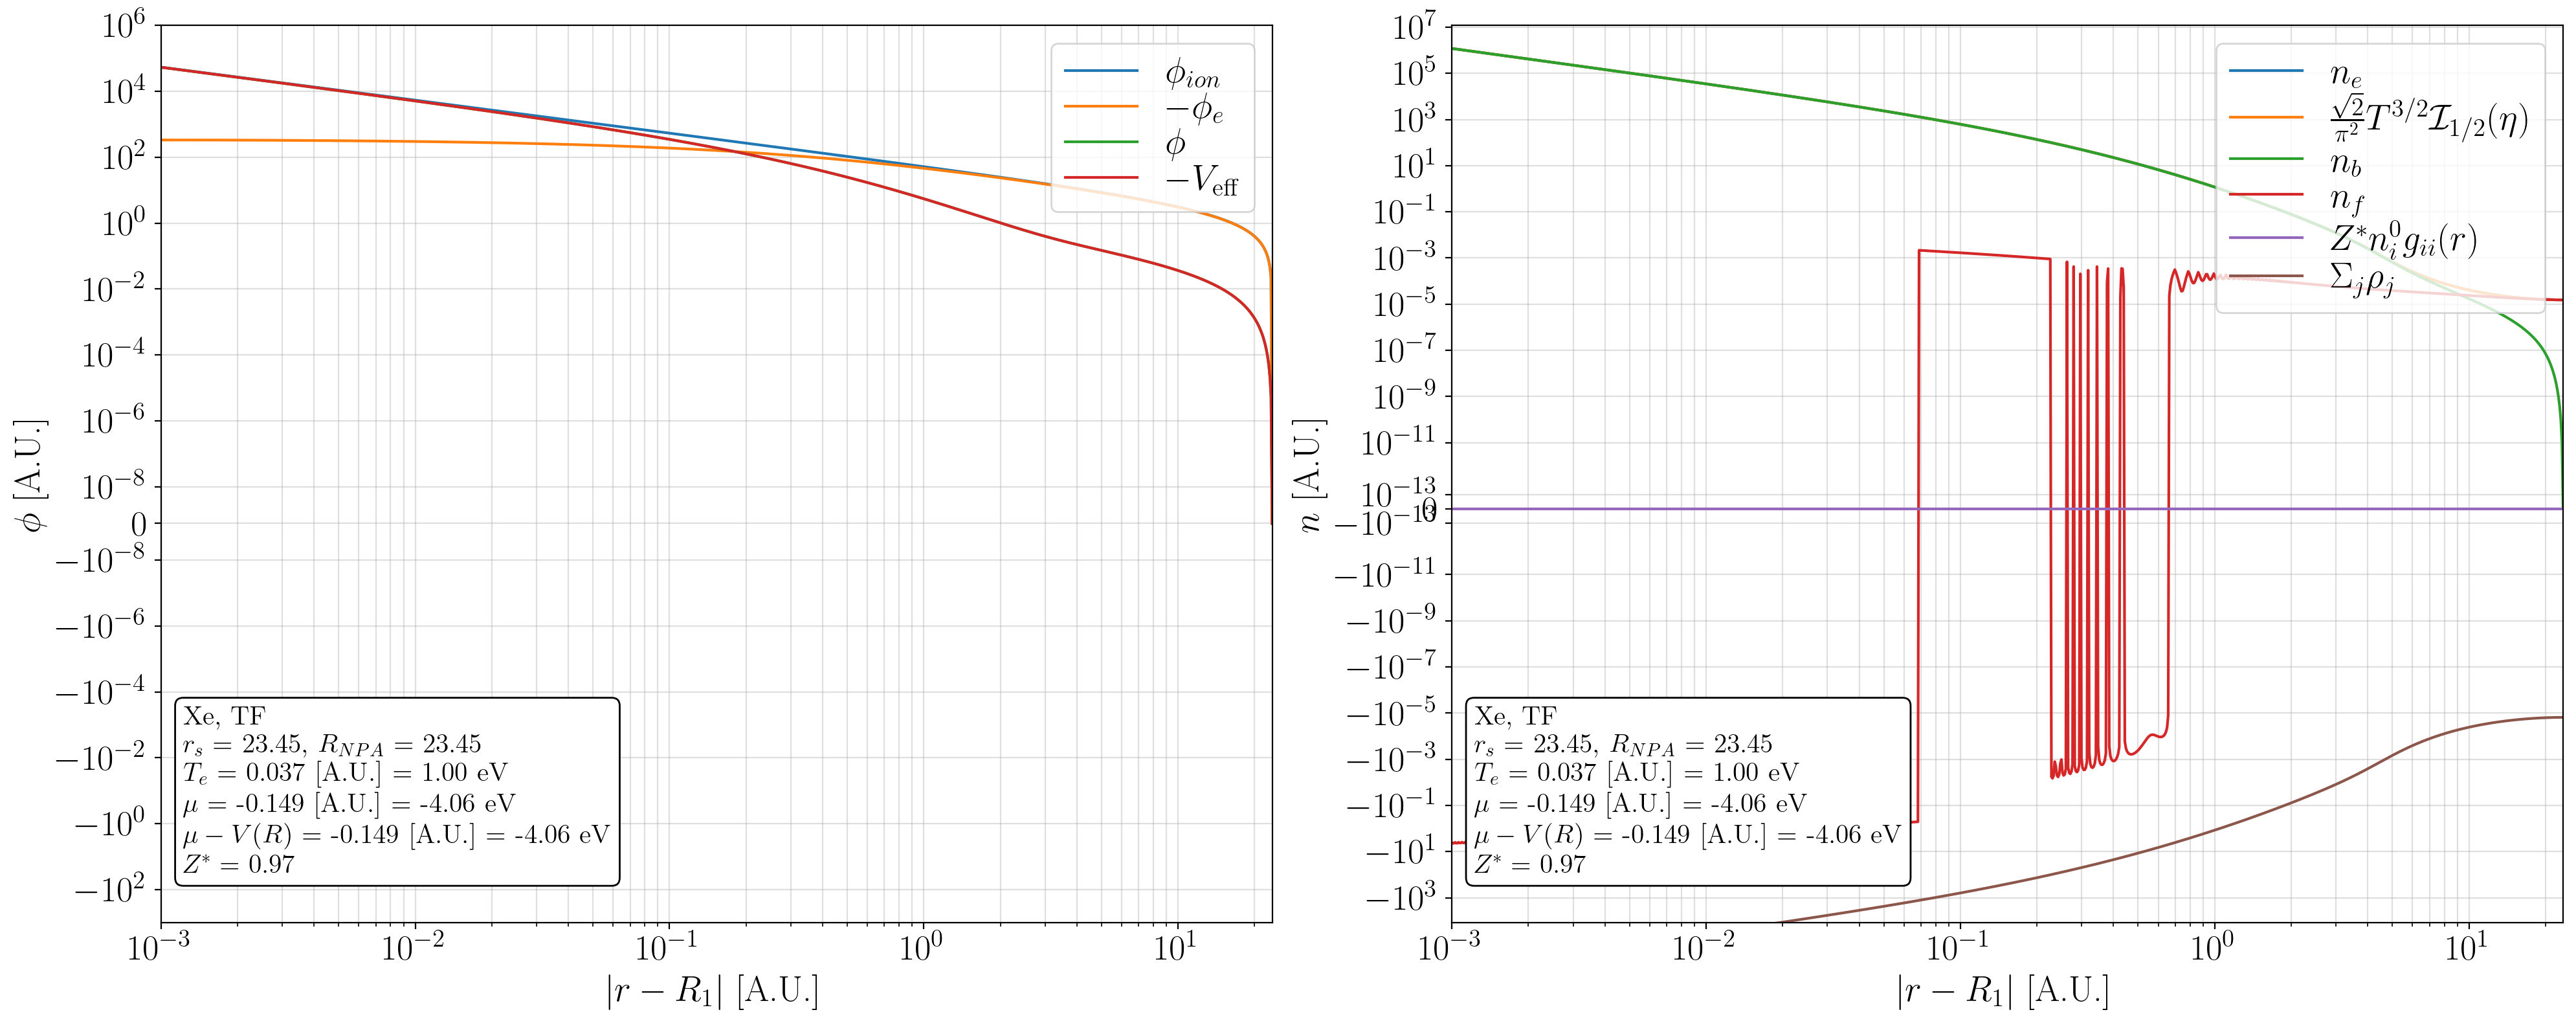

In [5]:
# aa_CS.core_atom.ne_bar = 1e-12
# aa_CS.core_atom.make_plots()
aa_ZJ.make_plots()


array([<Axes: xlabel='$|r-R_1|$ [A.U.]', ylabel='$4 \\pi r^2 n_e(r) $ [A.U.]'>,
       <Axes: xlabel='$|r-R_1|$ [A.U.]', ylabel='$4 \\pi r^2 n_e(r) $ [A.U.]'>],
      dtype=object)

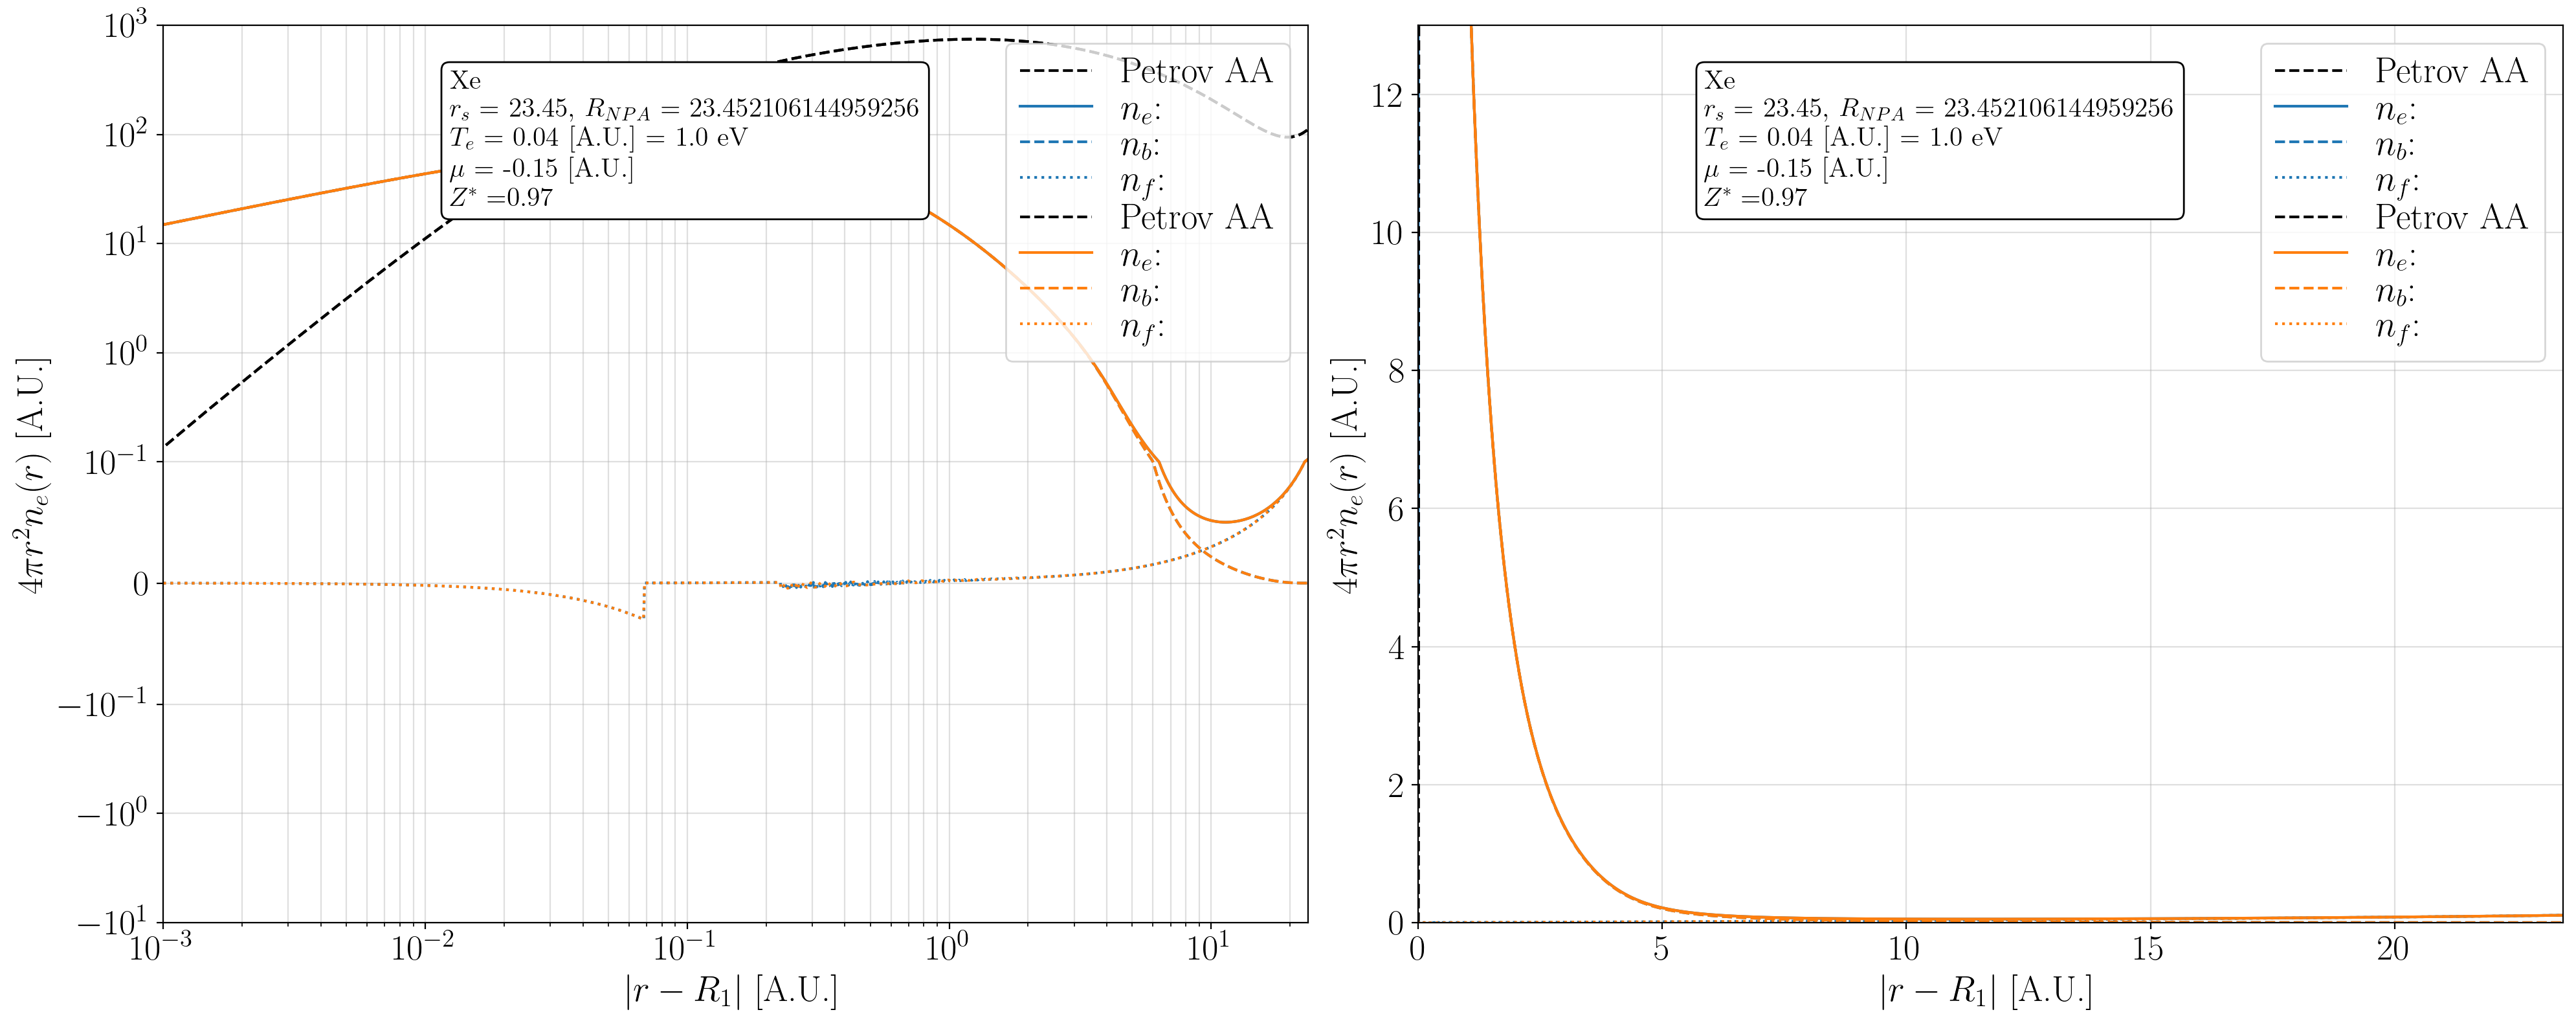

In [9]:
from importlib import reload
try:
    reload(plotting)
except NameError as e:
    from average_atom.core import plotting as plotting
    print("Error: ",e)
except Exception as e:
    print("Unexpected error during reload")
    print(e)
    
from average_atom.core.plotting import compare_aa, plot_convergence

compare_aa([aa_CS.core_atom, aa_ZJ])#, aa_CS.empty_atom])
# compare_aa([aa_ZJ])##, aa_CS.core_atom])

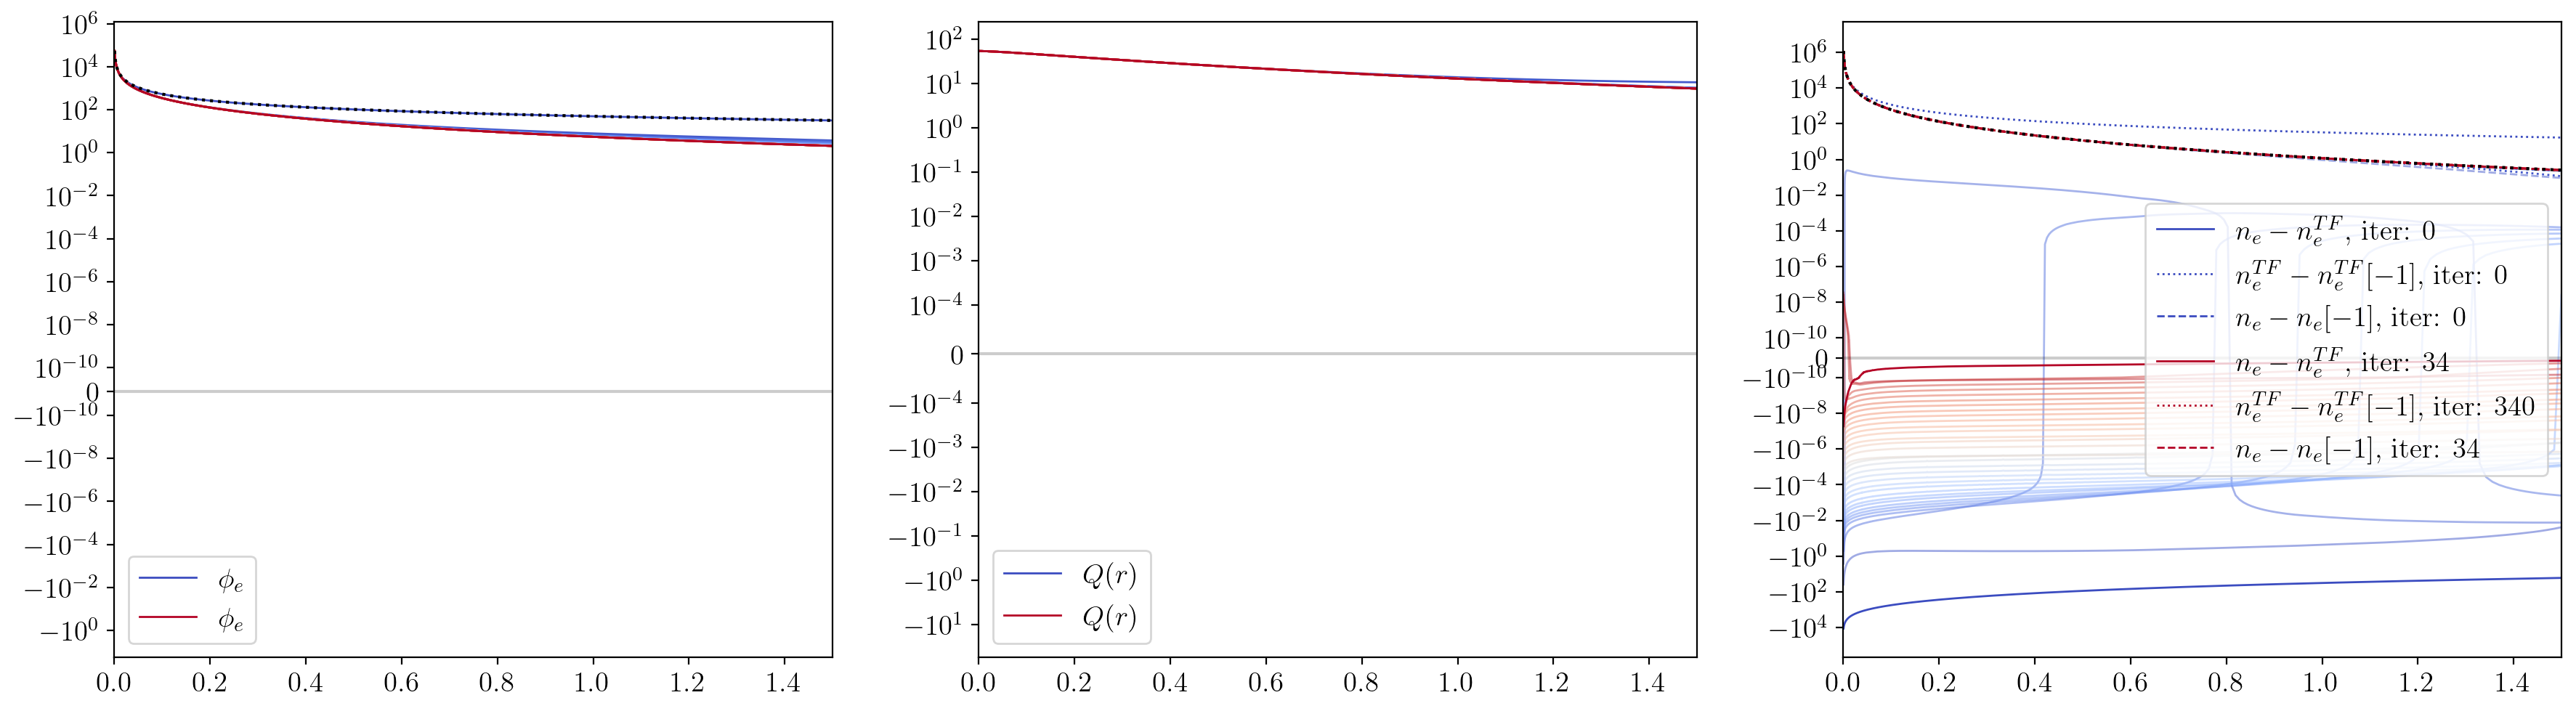

In [10]:
# plot_convergence(aa)
# plot_convergence(aa_CS.core_atom)
plot_convergence(aa_ZJ)

### EOS

In [18]:
def get_E(aa):
    βVeff = aa.get_βVeff(aa.φe, aa.ne, aa.ne_bar)
    η = aa.μ/aa.Te - βVeff
    βU = aa.grid.integrate_f(βVeff*aa.ne)
    
    φ_from_e_only = aa.get_φe(-aa.ne)[0] 
    φ_from_i_only = aa.get_φe(aa.ρi)[0] + aa.φion 
    U = -aa.grid.integrate_f(aa.ne * (0.5*φ_from_e_only + φ_from_i_only))

    I_onehalf = FermiDirac.Ionehalf(η)
    I_threehalf = FermiDirac.Ithreehalf(η)
    
    K = (2*aa.Te)**1.5/(2*π**2) * aa.Te * aa.grid.integrate_f( I_threehalf)
    return U, K, (U + K)

def get_P(aa):
    P = (2*aa.Te)**2.5/(6*π**2) * FermiDirac.Ithreehalf(aa.μ/aa.Te)
    return P

def print_EOS(aa):
    Ee_pot, Ee_K, Ee = get_E(aa)
    P_e =  get_P(aa)
    print(f"Ee_pot_density = {Ee_pot*aa.ni_bar:0.3e} [au], Ee_K = {Ee_K*aa.ni_bar:0.3e} [au], Ee_tot = {Ee*aa.ni_bar:0.3e} [au]")
    print(f"P_e = {P_e:0.3e} [au], {P_e*AU_to_bar/1e6:0.3e} [Mbar]")
    print(f"Virial if {Ee_K:0.3e} = {3/2*P_e*aa.Vol - 0.5*Ee_pot:0.3e} --->  off by {100*Ee_K/(3/2*P_e*aa.Vol - 0.5*Ee_pot) - 100:0.3e} % ")
    
    print(f"\nβEe_pot/Z = {Ee_pot/aa.Te/aa.Z:0.3f}, βEe_K/Z = {Ee_K/aa.Te/aa.Z:0.3f}, βEe_tot/Z = {Ee/aa.Te/aa.Z:0.3f}")
    print(f"βP_e Ω/Z = {P_e*aa.Vol/aa.Te/aa.Z:0.3f}")
    # print(f"Virial if {Ee_K:0.3e} = {3/2*P_e*aa.Vol - 0.5*Ee_pot:0.3e}")

print_EOS(aa_ZJ)

Ee_pot_density = -2.826e-01 [au], Ee_K = 1.389e-01 [au], Ee_tot = -1.437e-01 [au]
P_e = 5.655e-07 [au], 1.664e-04 [Mbar]
Virial if 7.505e+03 = 7.634e+03 --->  off by -1.691e+00 % 

βEe_pot/Z = -7694.042, βEe_K/Z = 3781.996, βEe_tot/Z = -3912.045
βP_e Ω/Z = 0.015
